- 아래는 코랩 한글폰트 설치
- 실행 후 런타임 재시작 필요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data3.csv', encoding='utf-8-sig')  # 인코딩은 상황에 따라 조정

In [ ]:
# 가격, 개수, 용량 컬럼을 100ml당 가격으로 통일하기
df['100ml당 가격']  = (df['가격'] * 100) // (df['개수'] * df['용량(ml)'])
df['총 용량'] = df['개수'] * df['용량(ml)']

del df['가격']
del df['용량(ml)']

print(df)

       productId                                             제목  개수  타겟  \
0    84195356355                                 딥디크 플레르드뽀 오드퍼퓸   1  공용   
1    82243246039  떼시스 블랑쉬 니치향수 코튼 비누향 베이비파우더 명품 수제 승무원 살냄새 오드퍼퓸   1  여성   
2    83879217159                                  딥디크 오르페옹 오드퍼퓸   1  공용   
3    89243673097                                  디올 소바쥬 오 드 퍼퓸   1  남성   
4    83103411378                     포맨트 포맨 시그니처 퍼퓸 코튼허그  블랙 향수   1  남성   
..           ...                                            ...  ..  ..   
293  88929371327               샤넬 1957 레 젝스클루시프 드 샤넬 오드 빠르펭  향수   1  여성   
294  86272108348                          샤넬 알뤼르 옴므 스포츠 오 드 뚜왈렛   1  남성   
295  89179693458                                바이레도 블랑쉬 오 드 퍼퓸   1  여성   
296  88642439381                  라페르  프리미엄 니치향수 지속력 좋은 니치퍼퓸 향수   2  공용   
297  87527669811                  춘몽 비누향 살냄새 향수 도플 퍼퓸 블랙베리 앤 베이   1  공용   

                                                   URL    평점      리뷰수  \
0    https://smartstore.na

In [ ]:
# '평점', '리뷰수', '향/냄새 만족도(%)', '지속력 만족도(%)' 열
# 학습할 데이터가 없을 경우(NaN)
# dropna를 이용하여 해당 행 제거
df = df.dropna(subset=['평점', '리뷰수', '향/냄새 만족도(%)', '지속력 만족도(%)'])

# 소수점이 존재하지 않는 데이터는 int형으로 변환
df['리뷰수'] = df['리뷰수'].astype(int)
df['향/냄새 만족도(%)'] = df['향/냄새 만족도(%)'].astype(int)
df['지속력 만족도(%)'] = df['지속력 만족도(%)'].astype(int)
df['총 용량'] = df['총 용량'].astype(int)
df['개수'] = df['개수'].astype(int)

# 학습에 필요하지 않는 데이터 제거
del df['productId']
del df['제목']
del df['URL']

print(df)

     개수  타겟    평점    리뷰수  향/냄새 만족도(%)  지속력 만족도(%)  100ml당 가격  총 용량
0     1  공용  4.92   1877           80          65     237333    75
1     1  여성  4.69  35165           55          57      33333    30
2     1  공용  4.94    687           82          68     241333    75
3     1  남성  4.63     30           74          57     122800   100
4     1  남성  4.80   2102           69          56      67980    50
..   ..  ..   ...    ...          ...         ...        ...   ...
293   1  여성  4.92     13           85          62     757142    35
294   1  남성  5.00     17           95          89     238000    50
295   1  여성  4.80     41           71          49     195800   100
296   2  공용  4.86     36           73          53      40000    60
297   1  공용  4.79   7251           68          52     109000    10

[293 rows x 8 columns]


<ipython-input-4-ce0910c89b1a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['리뷰수'] = df['리뷰수'].astype(int)
<ipython-input-4-ce0910c89b1a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['향/냄새 만족도(%)'] = df['향/냄새 만족도(%)'].astype(int)
<ipython-input-4-ce0910c89b1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

encoder = OneHotEncoder()  # sparse=True by default

encoded_array = encoder.fit_transform(df[['타겟']]).toarray()

# 타겟 컬럼의 데이터를 원핫인코딩을 통해 컬럼으로 새롭게 생성
encoded_col_names = encoder.get_feature_names_out(['타겟'])

# DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)
encoded_df.index = df.index  # 인덱스 맞춰주기

# 병합
df = pd.concat([df, encoded_df], axis=1)

del df['타겟']

# 편의를 위해 예측하고자 하는 컬럼(값)을 맨 마지막 컬럼으로 이동
df = df[[c for c in df.columns if c != '100ml당 가격'] + ['100ml당 가격']]

print(df)

     개수    평점    리뷰수  향/냄새 만족도(%)  지속력 만족도(%)  총 용량  타겟_공용  타겟_남성  타겟_여성  \
0     1  4.92   1877           80          65    75    1.0    0.0    0.0   
1     1  4.69  35165           55          57    30    0.0    0.0    1.0   
2     1  4.94    687           82          68    75    1.0    0.0    0.0   
3     1  4.63     30           74          57   100    0.0    1.0    0.0   
4     1  4.80   2102           69          56    50    0.0    1.0    0.0   
..   ..   ...    ...          ...         ...   ...    ...    ...    ...   
293   1  4.92     13           85          62    35    0.0    0.0    1.0   
294   1  5.00     17           95          89    50    0.0    1.0    0.0   
295   1  4.80     41           71          49   100    0.0    0.0    1.0   
296   2  4.86     36           73          53    60    1.0    0.0    0.0   
297   1  4.79   7251           68          52    10    1.0    0.0    0.0   

     100ml당 가격  
0       237333  
1        33333  
2       241333  
3       122800  
4 

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


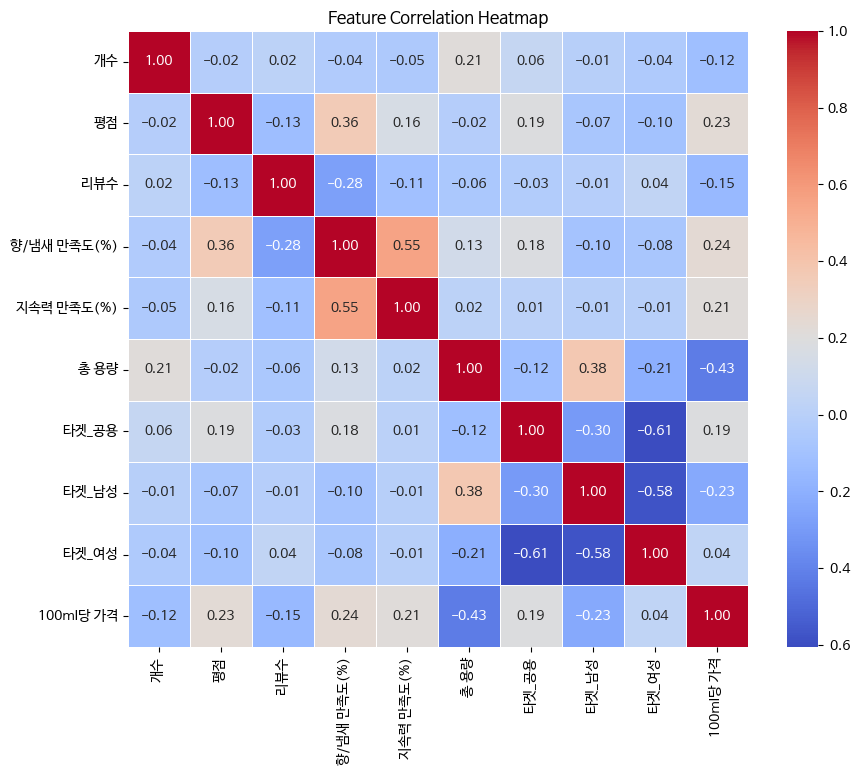

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글설정
plt.rc('font', family='NanumBarunGothic')

# 1. 상관계수 계산
corr = df.corr()

# 2. 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 분석
- 아래는 유의미한 상관관계를 토대로 한 분석 및 가설도출이다.

## 가격에 대한 분석 및 가설
1. 가격과 고객의 만족도(평점, 향/지속력 만족도)는 비례관계다.
  + 가설1  
    고품질의 재료사용으로 인해 가격이 증가하고 고객만족도가 상승하였다.
  + 가설2  
    고객의 수요에 따라 공급자가 가격을 증가시켰다.(수요 견인 인플레이션)

2. 남성/공용 향수가 여성향수에 비해 가격이 비싸다.
  + 가설1  
    향수에 대한 수요가 남성보다 여성이 높으므로 가격이 증가하였다.
  + 가설2  
    남성이 선호하는 향의 재료가 비교적 고가이다.

3. 총용량이 증가할수록 가격이 낮아진다.
  + 가설1  
    유통 수수료로 인해 고용량의 향수일수록 가격이 낮다.

### 추가적인 의견
- 개수가 많으면 포장비용으로 인해 가격이 더 증가될 것으로 예상했으나 오히려 반비례관계이다. 개수가 늘어날수록 평균적으로 총 용량이 늘어나는데, 가격과 용량이 반비례관계이므로 나타나는 현상으로 예상된다.
- 가격이 비쌀수록 구매하는 고객이 줄어드는 경우가 많다보니 리뷰수가 이에 영향을 받는 것으로 예상된다.
- 여성향수인지에 대한 여부는 상관관계가 낮은데 이는 향수의 가격이 여성향수를 기준으로 맞춰짐에 인한 것으로 예상된다.

In [ ]:
# 상관관계가 적은 타겟_여성 컬럼을 제거하고
# 타겟_공용, 타겟_남성이 0인 경우에 여성으로 파악하기
del df['타겟_여성']

In [ ]:
# 저장
df.to_csv('preprocessing_data.csv', index=False, encoding='utf-8-sig')